# Devoir 1 

Rédigé par Corey Ducharme et Olivier Sirois

## Préamble

In [2]:
using JuMP
using Clp
#using ConditionalJuMP
using Distributions
using PyPlot

## Problème du vendeur de journeaux

### Effet de l'écart type sur la décision de première étape

Comme vue en classe, la solution du problème du vendeur de journeaux avec un demande suivant une distribution Normale de moyenne $\mu$ et de variance $\sigma^2$ est 

<center>$ x^* = N^{-1}_{(\mu, \, \sigma^2)}\left(\frac{q-c}{q-r}\right)$</center>

Dans cette question, nous étudions l'effet de l'écart-type. Ainsi, nous allons tracer la relation entre la solution et l'écart-type pour des valeurs entière d'écart-type allant de 0 à 200.

Évidamment, la distribution Normal n'est pas défini pour un écart type de 0. Par contre, la solution de 1ère étape est évidente pour un tel écart-type. En effet, si le vendeur de journeaux connait exactement la demande (pas de variance), la solution optimale est tout simplement la demande moyenne qui est de 650 dans notre contexte. 

Calcul des valeurs pour notre espace de 1 à 200.

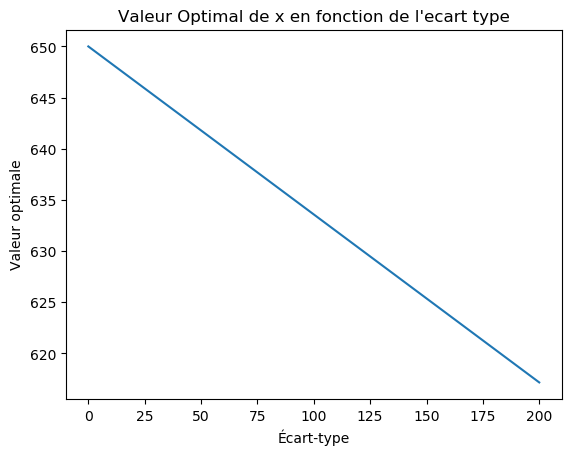

In [2]:
# Constantes
c = 0.15
q = 0.25
r = 0.02
mu = 650


solutions_optimales = [quantile(Normal(mu, x), (q-c)/(q-r)) for x in 1:200]

# On ajoute la solution optimales pour un écart-type de 0
unshift!(solutions_optimales, mu)

# Graphique de la relation
plot(range(0,201), solutions_optimales)
title("Valeur Optimal de x en fonction de l'ecart type")
xlabel("Écart-type")
ylabel("Valeur optimale")
show()

Comme nous pouvons constater, la solution optimal décroie linéairement avec l'écart-type. Ce résultat est attendue si nous étudions l'équation pour la solution. En effet, nous pouvons transformer l'équation de notre solution optimal en la ramenant à une normal centrée réduite.

<center>$ x^* = \sigma \phi^{-1}\left(\frac{q-c}{q-r}\right) + \mu$</center>

Où $\sigma$ est l'écart-type et $\phi$ est la distribution d'une Normale (0, 1).

In [3]:
quantile(Normal(0,1), 0.1/0.23)

-0.16421077707933102

Donc, le graphique est tout simplement cette équation linéaire où la pente est $\phi^{-1}(0.1/0.23) \approx -0.16$

### Éffet de l'écart-type sur la fonction stochastique

Nous cherchons issue à évaluer la fonction 

<center> $\mathcal{Q}(x) = qx - (q-r) \int_{-\infty}^x F(\omega) d\omega$ </center>
    
pour un écart-type allant de 0 à 200. 

Or $\mathcal{Q}(x)$, dépend de x et non pas uniquement de l'écart-type. Par contre, nous venons précédamment de calculer les valeurs optimales de x pour les différents écart-type. Ainsi, nous utilisons la valeur optimal de x pour chaque écart-type que nous avons calculées lorsque nous effectuons le calcul de $\mathcal{Q}$. 

Pour calculer $\mathcal{Q}(x)$, nous avons trouver que la valeur de l'intégral comme suivant 

<center>
$\begin{align}
\int_{-\infty}^x F(\omega) d\omega &= \int_{-\infty}^x \Phi(\mu, \sigma^2) \\
 &= \int_{-\infty}^x  \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{\omega - \mu}{\sqrt2 \sigma} \right) \right] d\omega \\
 &= \frac{1}{2} \int_{-\infty}^x \text{erfc} \left(- \frac{\omega - \mu}{\sqrt2 \sigma} \right) d\omega \\
 &= \frac{1}{2} (x - \mu) \, \text{erfc} \left(- \frac{x - \mu}{\sqrt2 \sigma} \right) + \frac{\sigma}{2} \sqrt{\frac{2}{\pi}} \exp{\frac{-(x-\mu)^2}{2\sigma^2}}
\end{align}$
</center>


Encore une fois, la valeur pour $\sigma = 0$ n'est pas définie. Par contre, la valeur de la solution stochastic est évidente. Rappellons nous de ce que $\mathcal{Q}$ représente le profit espérer réaliser par la vente de journeaux. Comme la demande de journeaux est connue à 650 (écart-type nul), nous savons que le vendeur va vendre 650. Donc, la valeur de $\mathcal{Q}$ est simplement $650 * q = 162.5 $.

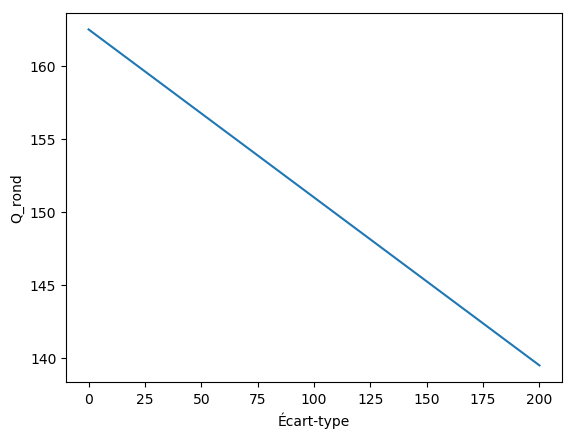

In [4]:
function q_rond(x, sigma)
    int = 1/2 * (x-mu)*erfc(-(x-mu)/(sqrt(2)*sigma)) + sigma/2*sqrt(2/pi)*exp(-(x-mu)^2/2/sigma^2)
    res = q*x - (q-r)*int
    return res
end

stoc_sol = [q_rond(solutions_optimales[i+1], i) for i in 1:200]

unshift!(stoc_sol, 162.5)

# Graphique de la relation
plot(range(0,201), stoc_sol)
xlabel("Écart-type")
ylabel("Q_rond")
show()

Surprenamant, la valeur de la solution stochastic est linéaire en fonction de l'écart-type de la demande.

### Effet de l'écart-type sur la solution du problème globale

Nous pouvons maintenant tracer, la solution du problème du vendeur de journal en fonction de l'écart-type qui sera aussi sur linéaire.

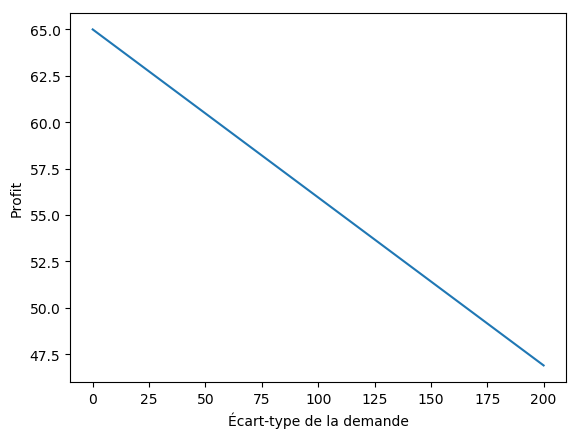

In [5]:
global_sol = [stoc_sol[i] - 0.15*solutions_optimales[i] for i in range(1, 201)]

plot(range(0,201), global_sol)
xlabel("Écart-type de la demande")
ylabel("Profit")
show()

Nous pouvons conclure que le problème du vendeur de journeaux possède des propriétés très faciles à étudier grâce à la linéarité de la solution.

En effet, nous pouvons trouver la valeur ajouté de la connaisse de l'écart-type.

In [6]:
pente = (global_sol[end]-global_sol[1])/200

-0.090527908652303

Ainsi, le gain de connaissance de l'écart-type apporte un profit supplémentaire de 0.09$/écart-type et ceci est invariant de la moyenne de la demande. Elle dépend uniquement des prix d'achat et de vente du journal.

De plus, nous pouvons déterminer la valeur d'écart-type à laquelle le vendeur de journaux peut encore tiré un profit soit l'abscisse à l'origine.

In [7]:
-65/pente

718.0106220022175

In [8]:
#We already know the optimal value of x in the mean case scenario is 650
#we can then assume that we will always buy 650 journal for the optimal mean
#case

#Now for the Stochastic Solution, we can directly use our results from the
#newsvendor problem and adjust it in accordance with the uncertainty (variance)
#we can store all of the optimal stochastic response of our problem
#println(Stoc)
VSS = (Stoc .* (q-c)) .- MeanCase
figure(2)
plot(VSS, color="blue")
title("Valeur de la Solution Stochastique en fonction de la Variance")
xlabel("Variance")
ylabel("VSS")
show()

LoadError: [91mUndefVarError: Stoc not defined[39m

On peut conclure que l'impact de la variance fait varier l'incertitude de notre second stage. Par contre, l'impact de cette incertitude est affecter par le ratio de profit/perte de nos couts. si nos valeurs de c,r changerait de sorte que c/r augmenterait, la pente de notre courbe augmenterait tandis que l'inverse la ferait diminuer d'avantage.

En ce qui concerne la valeur de la solution stochastique, la valeur de l'esperance ne changerait pas etant donner que la moyenne de notre distribution ne varie pas. La seule chose qui varie est l'ecart-type.


## Discrétisation de la demande et simulation Monte Carlo

In [91]:
function newsStoch(k::Int64)
    srand(123) # Setting the seed
    # Constantes
    c = 0.15
    q = 0.25
    r = 0.02
    mu = 650
    sigma = 80

    d = Normal(mu, sigma)
    sample = rand(d, k)
    N = 10^k
    prob = 1/(10^k)
    demande = linspace(450, 850, 10^k)
    
    m = Model(solver=ClpSolver())
    
    @variable(m, 1200 >= x >= 0)
    
    @variable(m, y[1:N] >= 0)
    @constraint(m, lowert_x[i=1:N], y[i] <= x)
    @constraint(m, lowert_dem[i=1:N], y[i] <= demande[i])
    
    @variable(m, w[i=1:N]>=0)
    
    @constraint(m, lowertx[i=1:N], w[i] <= x)
    @constraint(m, hightdem[i=1:N], w[i] >= (x - demande[i]))
    
    @constraint(m, total_sales[i=1:k], y[i] + w[i] == x)
    
    @objective(m, Max, -c*x + sum(prob*(q*y[i] + r*w[i]) for i=1:N))
    
    status = solve(m)
    
    return m , status, x
end
    

newsStoch (generic function with 1 method)

In [92]:
#monte_carlo_sol = Array{Float64}(6)

mstoch, status, x = newsStoch(1)
monte_carlo_sol = getvalue(x)
println(monte_carlo_sol)

627.7777777777778


In [93]:
mstoch, status, x = newsStoch(2)
monte_carlo_sol = getvalue(x)
println(monte_carlo_sol)

639.89898989899


In [94]:
mstoch, status, x = newsStoch(3)
monte_carlo_sol = getvalue(x)
println(monte_carlo_sol)

642.1921921921922


In [95]:
mstoch, status, x = newsStoch(4)
monte_carlo_sol = getvalue(x)
println(monte_carlo_sol)

642.019201920192


In [ ]:
mstoch, status, x = newsStoch(5)
monte_carlo_sol = getvalue(x)
println(monte_carlo_sol)

In [ ]:
mstoch, status, x = newsStoch(6)
monte_carlo_sol = getvalue(x)
println(monte_carlo_sol)

Pour cette question, nous allons simplement simuler 10^k ou k=1,2,3..6 essaies. Lors de nos essaies, nous allons prendre aleatoirement une decision first stage et second stage. Nous pourrons ensuite representer toutes ces essaies dans un graphe et en interpreter nous-memes les resultats.

In [ ]:
function secondstage(d::Float64, x::Int64)
    c = 0.15
    q = 0.25
    r = 0.02
    
    if d > x
        return x*(q-c)
    else
        return d*w + (x-d)*r - x*c
    end
    
end

In [12]:
Mean_X = Array{Float64}(401)
SD_X = Array{Float64}(401)

k = 6


d = Normal(650, 80)

temp = Array{Float64}(10^k)
for i = 450:850
    
    for j = 1:10^k
        temp[j] = secondstage(rand(d), i)
    end
    
    Mean_X[i-449] = mean(temp)
    SD_X[i-449] = std(temp)
end
figure(1)
plot(450:850,Mean_X)
title("Valeur Moyenne de la solution en fonction du nombre de journaux acheter (x)")
xlabel("Nombre de journaux acheter")
ylabel("Valeur moyenne de la solution")
figure(2)
errorbar(450:850, Mean_X, yerr=SD_X, color="green")
xlabel("Nombre de journaux acheter")
ylabel("Valeur moyenne de la solution")
show()


LoadError: [91mUndefVarError: secondstage not defined[39m

Comme vous pouvez le constatez dans notre image, on peut voir que les meilleurs solution sont pres de la valeurs estimer (soit 640 pour ecart-type = 80). Nous avons obtenus le graphe en estimant 10^k tirs pour chaque demande possible. Nous avons ensuite pris la moyenne et l'écart-type de toute ces essaies et les afficher en fonction du nombre de journaux acheter, soit notre decision First-Stage. 

Lorsqu'on essaie avec des valeurs de k plus faible. On peut remarquer que beaucoup de bruit s'introduit dans nos données et qu'elle sont beaucoup moins fluides. C'est due au fait que nous avons besoin de beaucoup d'échantillonnages pour bien représenter toutes les possibilités de notre modèle.

Notre solution finale tend exactement vers les valeurs obtenus précédement avec les méthodes analytique. Par contre, en augmentant la valeur k nous avons des données beaucoup plus claire, au pris d'un temps de calcule assez élevé. 